In [125]:
import pyautogui
import cv2
import numpy as np
import keyboard  # using module keyboard
from pynput.keyboard import Key, Controller
from time import sleep
import matplotlib.pyplot as plt
from time import time
import win32gui, win32ui,win32con, win32api

In [138]:
# Loop over the frames
control = Controller()
sleep(4)
control.press(Key.space)
control.release(Key.space)

image_data = []
target = []


loop_time = time()
while True: 
    # Take a screenshot 
    screen = pyautogui.screenshot()
    # Convert the output to a numpy array
    screen_array = np.array(screen)
    # Crop out the region we want - height, width, channels   
    cropped_region = screen_array[410:860, 15:820, :]
    # Convert the color channel order
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)
    
    # only edges 
    image = cv2.Canny(corrected_colors, threshold1=119, threshold2=250)
    # Handle the rendering of the images/video
    image = cv2.resize(image, (224, 224))
    cv2.imshow('GameCap', image)
    
    print('FPS {}'.format(1/(time() - loop_time)))
    loop_time = time()
    
    if keyboard.is_pressed("down"):
        print("You pressed down")
        data = np.array(image)
        image_data.append(data)
        target.append('down')

    
    if keyboard.is_pressed("up"):
        print("You pressed up")
        data = np.array(image)
        image_data.append(data)
        target.append('up')
    
    if keyboard.is_pressed("left"):
        print("You pressed left")
        data = np.array(image)
        image_data.append(data)
        target.append('left')

    # Cv2.waitkey   
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
# Close down the frame
cv2.destroyAllWindows()

FPS 4.823245576712105
FPS 9.574703066467912
FPS 9.780488942365988
FPS 17.251919825930297
FPS 14.643126712866794
FPS 15.865339733478585
FPS 15.171358088995955
FPS 12.13464604061369
FPS 12.242604327508253
FPS 19.576407331519277
FPS 11.896271126830472
FPS 14.307217901487242
FPS 15.301424235349055
FPS 12.608797862010707
FPS 11.368248728143998
FPS 14.501771964581453
FPS 16.13951161698951
FPS 15.422446600799379
FPS 14.811023065949122
FPS 15.13462489129768
FPS 15.164117804435381
FPS 15.151518654451927
FPS 12.977626510311113
FPS 17.69061798795404
FPS 13.949487491602312
FPS 17.172527585006858
FPS 9.979048847163172
FPS 14.456038767224324
FPS 15.361443885716797


In [143]:
def get_screenshot(region=None):
    #hwnd = win32gui.FindWindow(None, window_name)
    hwnd = win32gui.GetDesktopWindow()
    if region:
        left, top, x2, y2 = region
        width = x2 - left + 1
        height = y2 - top + 1
    else:
        width = win32api.GetSystemMetrics(win32con.SM_CXVIRTUALSCREEN)
        height = win32api.GetSystemMetrics(win32con.SM_CYVIRTUALSCREEN)
        left = win32api.GetSystemMetrics(win32con.SM_XVIRTUALSCREEN)
        top = win32api.GetSystemMetrics(win32con.SM_YVIRTUALSCREEN)
    
    # get the window image data
    wDC = win32gui.GetWindowDC(hwnd)
    dcObj = win32ui.CreateDCFromHandle(wDC)
    cDC = dcObj.CreateCompatibleDC()
    dataBitMap = win32ui.CreateBitmap()
    dataBitMap.CreateCompatibleBitmap(dcObj, width, height)
    cDC.SelectObject(dataBitMap)
    cDC.BitBlt((0, 0), (width, height), dcObj, (left, top), win32con.SRCCOPY)

    # convert the raw data into a format opencv can read
    signedIntsArray = dataBitMap.GetBitmapBits(True)
    img = np.fromstring(signedIntsArray, dtype='uint8')
    img.shape = (height, width, 4)

    # free resources
    dcObj.DeleteDC()
    cDC.DeleteDC()
    win32gui.ReleaseDC(hwnd, wDC)
    win32gui.DeleteObject(dataBitMap.GetHandle())

    img = np.ascontiguousarray(img)

    return img

In [114]:
win32gui.GetDesktopWindow()

65552

C:\Users\Xarly\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


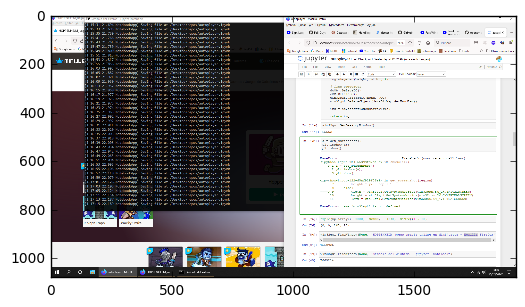

In [126]:
a = get_screenshot()
plt.imshow(a);
plt.show()

In [76]:
tuple(np.array((-32000, -32000, -31840, -31972))+32000)

(0, 0, 160, 28)

In [84]:
win32gui.FindWindow(None, 'HOPPENHELM juego gratis online en Minijuegos - Mozilla Firefox')

9568926

In [49]:
win32gui.FindWindow(None, 'Símbolo del sistema - jupyter  notebook')

7669214

In [56]:
win32gui.FindWindow(None, 'autoplayer - Mozilla Firefox')

66290

In [116]:
win32gui.GetDesktopWindow()

65552

In [81]:
win32gui.GetWindowRect(66290)

(-8, -8, 1928, 1048)

In [86]:
win32gui.GetWindowRect(9568926)

(408, 76, 1374, 957)

In [146]:
target

['left',
 'left',
 'left',
 'left',
 'left',
 'left',
 'left',
 'left',
 'left',
 'left',
 'left',
 'left',
 'left',
 'left',
 'left',
 'left']

In [145]:
# Loop over the frames
control = Controller()

image_data = []
target = []

loop_time = time()
while True: 

    img = get_screenshot((0,0,1920 , 1080))
    cropped_region = img[410:860, 15:820, :]
    
    # Handle the rendering of the images/video
    image = cv2.resize(cropped_region, (224, 224))
        # Crop out the region we want - height, width, channels   
    
    image = cv2.Canny(image, threshold1=119, threshold2=250)
    cv2.imshow('GameCap', image)
    
    print('FPS {}'.format(1/(time() - loop_time)))
    loop_time = time()

    if keyboard.is_pressed("right"):
        print("You pressed right")
        data = np.array(image)
        image_data.append(data)
        target.append('right')
    
    if keyboard.is_pressed("up"):
        print("You pressed up")
        data = np.array(image)
        image_data.append(data)
        target.append('up')
    
    if keyboard.is_pressed("left"):
        print("You pressed left")
        data = np.array(image)
        image_data.append(data)
        target.append('left')

    # Cv2.waitkey  
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
# Close down the frame
cv2.destroyAllWindows()

C:\Users\Xarly\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


FPS 12.520086207411211
FPS 16.56439663207115
FPS 20.94167810869511
FPS 14.851772770890653
FPS 19.04363737077009
FPS 19.150586484154196
FPS 16.050512974563656
FPS 15.180528058777755
FPS 14.985223082859347
FPS 18.68628123621686
FPS 17.064236457210278
FPS 13.787347064895107
FPS 17.54505791457339
FPS 17.664764423704614
FPS 19.948652826329933
FPS 15.284863105801923
FPS 19.43165824256772
FPS 15.45324387754726
FPS 20.16928662451011
FPS 18.294088654910563
FPS 20.262338164251208
FPS 14.431964105069746
FPS 16.23214071479711
FPS 19.299951224450353
FPS 14.649929095849837
FPS 15.616532815053931
FPS 19.25255557544628
FPS 20.382169566971033
FPS 13.997670561301282
FPS 15.391263503992485
FPS 14.812069160357103
FPS 15.623920671697945
FPS 20.452636609223987
FPS 15.852028224693962
FPS 14.266388661185923
FPS 14.639140283337928
FPS 15.446414695494939
FPS 19.071779994725404
FPS 20.83991593089639
FPS 19.243898969970864
FPS 13.783314656773019
FPS 16.373382884535808
FPS 19.83638298375464
FPS 19.93092633599757
F

In [129]:
import PIL.ImageGrab

In [130]:
img = PIL.ImageGrab.grab()
img.show()

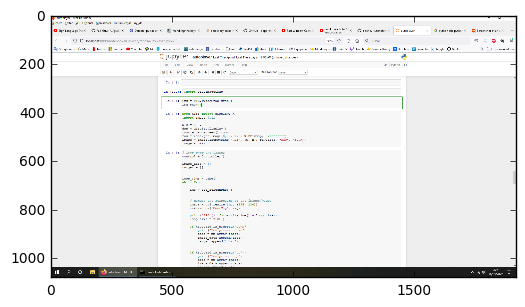

In [132]:
screen_array = np.array(img)
plt.imshow(screen_array)
plt.show()

In [ ]:
from Xlib import display, X
import Image #PIL

W,H = 200,200
dsp = display.Display()
root = dsp.screen().root
raw = root.get_image(0, 0, W,H, X.ZPixmap, 0xffffffff)
image = Image.fromstring("RGB", (W, H), raw.data, "raw", "BGRX")
image.show()

In [136]:
# Loop over the frames
control = Controller()

image_data = []
target = []

loop_time = time()
while True: 

    img = PIL.ImageGrab.grab()
    img = np.array(img)
    
    # Handle the rendering of the images/video
    image = cv2.resize(img, (224, 224))
    
    cv2.imshow('GameCap', image)
    
    print('FPS {}'.format(1/(time() - loop_time)))
    loop_time = time()
    
    if keyboard.is_pressed("down"):
        print("You pressed down")
        data = np.array(image)
        image_data.append(data)
        target.append('down')

    
    if keyboard.is_pressed("up"):
        print("You pressed up")
        data = np.array(image)
        image_data.append(data)
        target.append('up')
    
    if keyboard.is_pressed("left"):
        print("You pressed left")
        data = np.array(image)
        image_data.append(data)
        target.append('left')

    # Cv2.waitkey  
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
# Close down the frame
cv2.destroyAllWindows()

FPS 8.4087722358215
FPS 10.31529967290524
FPS 8.201739565734309
FPS 8.007820136852395
FPS 8.007544950877636
FPS 8.166575154694176
FPS 7.645078267970282
FPS 10.75920520016212
FPS 8.757399612480791
FPS 9.82401439064608
FPS 9.009584609634445
FPS 11.89323518486487
FPS 7.2621347120116075
FPS 9.987508185400817
FPS 10.218246311563274
FPS 9.181745543542268
You pressed up
FPS 11.665945362608266
FPS 9.034113476093859
FPS 8.62021596247991
FPS 8.694497822387227
FPS 10.767684910160272
FPS 11.20336343651754
FPS 8.789957457509901
FPS 10.130459460569186
You pressed left
FPS 8.743178876143107
You pressed left
FPS 11.420561511086182
FPS 12.017925295985146
FPS 8.52916870017895
FPS 11.023920225613907
FPS 10.70065592256491
FPS 12.864779314786983
You pressed down
FPS 12.028609611865992
You pressed down
FPS 9.998269380671891
You pressed left
FPS 11.098097531288863
You pressed left
FPS 10.597698187101257
You pressed down
FPS 8.924373860331118
You pressed left
FPS 14.170472551344814
You pressed down
FPS 11.782

In [41]:
target

['up', 'up', 'up', 'down', 'down', 'down', 'left', 'left']

In [37]:
def holi(x):
    print("hlo")

keyboard.on_press_key('a', holi)
sleep(5)

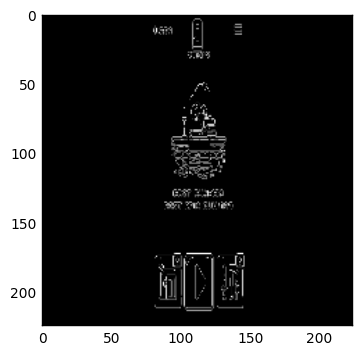

In [31]:
plt.imshow(image_data[2], cmap="gray");
plt.show()

In [13]:
def onkeypress(event):
    if event.name == 'q':
        print("qqqqqqq")
             
def onkeyrel(event):
    print(event.name)
    if event.event_type == keyboard.KEY_DOWN:
        print(" no  qqqqqqq")

# ---------> hook event handler
keyboard.on_press(onkeyrel)
#keyboard.on_release(onkeyrel)
# --------->

<function keyboard.hook.<locals>.remove_>

space was pressed!
space was pressed!


In [8]:
keyboard.add_hotkey('space', lambda: print('space was pressed!'))

<function keyboard.add_hotkey.<locals>.remove_>

space was pressed!
space was pressed!
space was pressed!


In [ ]:
from pynput.keyboard import Listener


def on_press(key):  # The function that's called when a key is pressed
    print("Key pressed: {0}".format(key))
    if key==Key.down

def on_release(key):  # The function that's called when a key is released
    print("Key released: {0}".format(key))

with Listener(on_press=on_press, on_release=on_release) as listener:  # Create an instance of Listener
    listener.join()  # Join the listener thread to the main thread to keep waiting for keys

Key pressed: Key.down
Key released: Key.down
Key pressed: Key.left
Key released: Key.left
Key pressed: 'h'
Key pressed: 'o'
Key released: 'h'
Key released: 'o'
Key pressed: 'l'
Key released: 'l'
Key pressed: 'a'
Key released: 'a'
Key pressed: Key.backspace
Key released: Key.backspace
Key pressed: Key.backspace
Key released: Key.backspace
Key pressed: Key.backspace
Key released: Key.backspace
Key pressed: Key.backspace
Key released: Key.backspace
Key pressed: Key.esc
Key released: Key.esc
Key pressed: Key.ctrl_l
Key pressed: '\x03'
Key released: Key.ctrl_l
Key released: 'c'
Key pressed: 'f'
Key released: 'f'
Key pressed: Key.backspace
Key released: Key.backspace
Key pressed: Key.backspace
Key released: Key.backspace
Key pressed: Key.ctrl_l
Key pressed: '\x03'
Key released: Key.ctrl_l
Key released: 'c'
Key pressed: Key.ctrl_l
Key released: Key.ctrl_l
Key pressed: Key.ctrl_l
Key pressed: '\x16'
Key released: Key.ctrl_l
Key released: 'v'
Key pressed: Key.shift_r
Key pressed: Key.enter
Key 

In [ ]:
pynput.keyboard.Listener.stop 

In [ ]:
listener.stop()

In [4]:
from pynput.keyboard import Key, Controller
from time import sleep
keyboard = Controller()
sleep(4)
keyboard.press(Key.space)
keyboard.release(Key.space)
print("done")

done


In [5]:
!pip install pywin32

You are using pip version 18.0, however version 20.3.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [115]:
def winEnumHandler(hwnd, ctx):
    if win32gui.IsWindowVisible(hwnd):
        print(hex(hwnd), win32gui.GetWindowText(hwnd))
win32gui.EnumWindows(winEnumHandler, None)

0x3504d4 
0x200de 
0x20242 
0x102f2 autoplayer - Mozilla Firefox
0x306fe 
0x7505de Símbolo del sistema - jupyter  notebook
0x92029e HOPPENHELM juego gratis online en Minijuegos - Mozilla Firefox
0x10356 Microsoft Text Input Application
0x101b0 
0x101a8 
0x1018a 
0x10188 
0x201b2 
0x970440 
0x20152 Program Manager


In [ ]:
-+